In [3]:
from sklearn.datasets import load_boston
import pandas as pd

In [4]:
X,y = load_boston(return_X_y=True)

# print(x)
# print(y)

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt

In [6]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=5))
])

pipe.get_params()


{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [7]:
mod = GridSearchCV(estimator=pipe, param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, cv=3)

In [8]:
mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

pred = mod.predict(X)

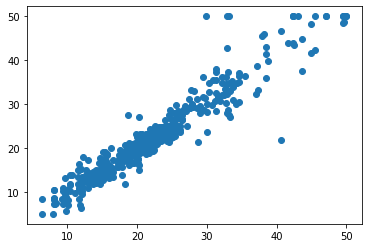

In [9]:
plt.scatter(pred, y)

In [10]:
import numpy as np

df = pd.read_csv("data.csv")

df.head(6)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004362,284.251445,a
4,185.243182,308.187571,a
5,180.095699,289.569088,a


In [11]:
X = df[["x", "y"]].values
y = df['z'] == "a"

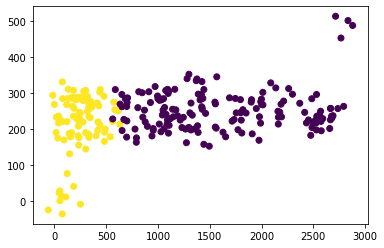

In [12]:
plt.scatter(X[:,0], X[:, 1], c=y)

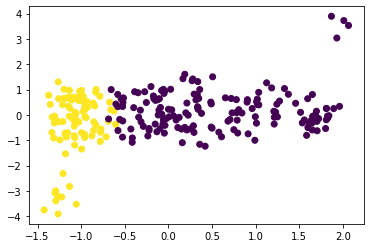

In [13]:
X_new = StandardScaler().fit_transform(X)

plt.scatter(X_new[:,0], X_new[:, 1], c=y)

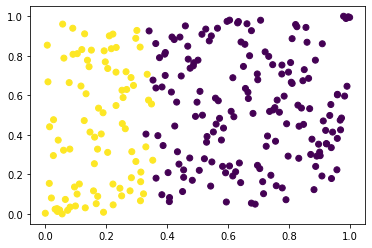

In [14]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)

plt.scatter(X_new[:,0], X_new[:, 1], c=y)

In [15]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

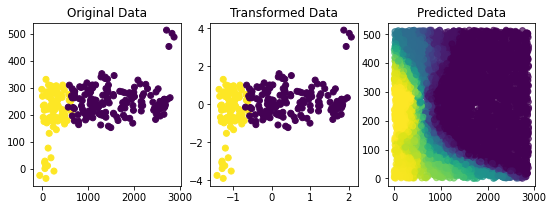

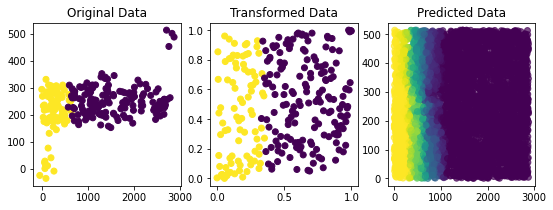

In [16]:
plot_output(scaler= StandardScaler())
plot_output(scaler= QuantileTransformer(n_quantiles=100))

In [17]:
df = pd.read_csv("data_2.csv")

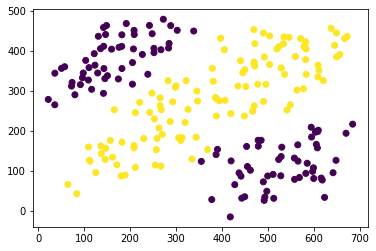

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


X = df[["x", "y"]].values
y = df['z'] == "a"
plt.scatter(X[:,0], X[:,1], c=y)


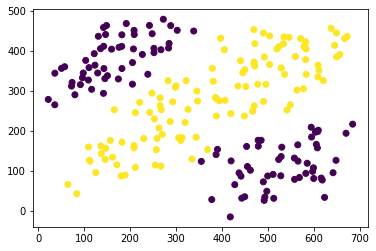

In [19]:
pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

In [20]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [21]:
from sklearn.preprocessing import OneHotEncoder

handle-unknown = helps us not error on data that we haven't see before. (Really only use it on the X variable)
sparse = helps handle versus the percentage of values that are zero. 

In [22]:

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [23]:
enc.transform([["zero"]])

array([[0., 0., 0.]])

Metrics

In [24]:
df_cc = pd.read_csv("creditcard.csv")[:80_000]
df_cc.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [25]:
X = df_cc.drop(columns=["Time", "Amount", "Class"]).values
y = df_cc["Class"].values

f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [26]:
mod = LogisticRegression(class_weight={0:1, 1:2}, max_iter=1000)

print(mod.fit(X,y).predict(X).sum())

171


In [27]:
# lr = LogisticRegression()

# ??lr.score

In [28]:
grid = GridSearchCV(
    estimator= LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1, 1:v} for v in range(1,4)]},
    cv=4,
    n_jobs=-1
)

grid.fit(X,y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [29]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.414475,0.279321,0.004318,0.000795,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.99405,0.99835,0.99945,0.99780,0.997413,0.002030,1
1,1.303188,0.457534,0.004179,0.000811,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.99025,0.99840,0.99960,0.99805,0.996575,0.003697,2
2,1.046888,0.114269,0.003300,0.001098,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.98730,0.99845,0.99960,0.99815,0.995875,0.004980,3


In [30]:
from sklearn.metrics import precision_score, recall_score, make_scorer

print(f'Precision score: {precision_score(y, grid.predict(X))}')
print(f'Recall score: {recall_score(y, grid.predict(X))}')

"Recall tells us how many of the cases we captured"
"Precision tells us given that I predicted fraud how accurate are we"

Precision score: 0.7682119205298014
Recall score: 0.5918367346938775


'Precision tells us given that I predicted fraud how accurate are we'

Adding scoring to control the metric we care about. (There is already predefined scoring options this is to create one from scratch)

In [31]:
grid = GridSearchCV(
    estimator= LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1, 1:v} for v in np.linspace(1, 20, 30)]},
    scoring= {'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)},
    refit='precision', #let's gridsearch know what score to use for ranking
    return_train_score=True,
    cv=10,
    n_jobs=-1
)

grid.fit(X,y)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,split5_train_recall_score,split6_train_recall_score,split7_train_recall_score,split8_train_recall_score,split9_train_recall_score,mean_train_recall_score,std_train_recall_score
0,1.712107,0.156575,0.008167,0.001396,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,1.688974,0.145520,0.009628,0.002783,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.463415,0.583333,1.000000,...,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,1.640974,0.202291,0.008963,0.002063,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.463415,0.583333,1.000000,...,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,1.656338,0.141759,0.007880,0.001404,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.000000,0.452381,0.583333,1.000000,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
4,1.439808,0.236591,0.007521,0.001463,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.000000,0.452381,0.583333,1.000000,...,0.824859,0.740113,0.755682,0.744318,0.727273,0.778409,0.784091,0.761364,0.771498,0.037959
5,1.491191,0.236816,0.008071,0.001243,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",1.000000,0.452381,0.583333,1.000000,...,0.841808,0.768362,0.778409,0.789773,0.772727,0.789773,0.795455,0.772727,0.792485,0.029289
6,1.480094,0.160910,0.008877,0.002304,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.802260,0.789773,0.818182,0.801136,0.801136,0.818182,0.789773,0.812327,0.021063
7,1.446255,0.187553,0.008711,0.001689,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.813559,0.829545,0.829545,0.812500,0.806818,0.835227,0.818182,0.827080,0.017190
8,1.494830,0.147830,0.008444,0.001582,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.944444,0.452381,0.583333,0.947368,...,0.847458,0.824859,0.846591,0.835227,0.823864,0.829545,0.857955,0.829545,0.838431,0.013974
9,1.577502,0.273417,0.009803,0.002304,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.944444,0.452381,0.583333,0.947368,...,0.853107,0.830508,0.846591,0.835227,0.829545,0.835227,0.863636,0.846591,0.844665,0.012015


In [32]:
df = pd.DataFrame(grid.cv_results_)

print(df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_class_weight', 'params', 'split0_test_precision',
       'split1_test_precision', 'split2_test_precision',
       'split3_test_precision', 'split4_test_precision',
       'split5_test_precision', 'split6_test_precision',
       'split7_test_precision', 'split8_test_precision',
       'split9_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_train_precision',
       'split1_train_precision', 'split2_train_precision',
       'split3_train_precision', 'split4_train_precision',
       'split5_train_precision', 'split6_train_precision',
       'split7_train_precision', 'split8_train_precision',
       'split9_train_precision', 'mean_train_precision', 'std_train_precision',
       'split0_test_recall_score', 'split1_test_recall_score',
       'split2_test_recall_score', 'split3_test_recall_score',
       'split4_test_recall_score', 'split5_test_recall_s

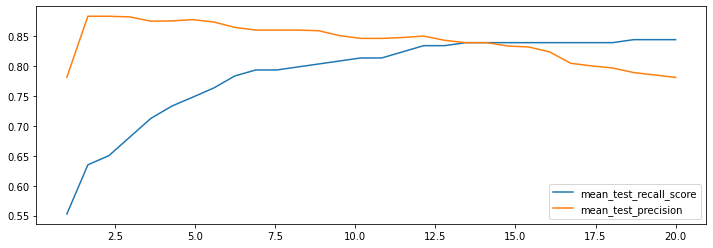

In [33]:
plt.figure(figsize=(12, 4))

for score in ['mean_test_recall_score', 'mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']], df[score], label=score)

plt.legend();

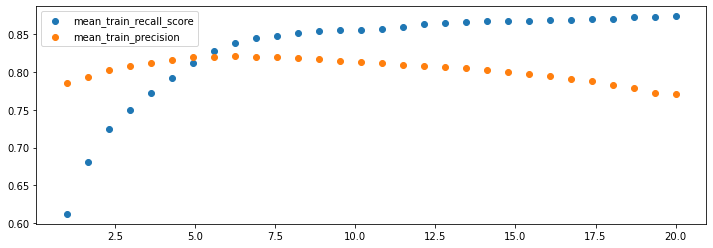

In [34]:
plt.figure(figsize=(12, 4))

for score in ['mean_train_recall_score', 'mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df["param_class_weight"]], y=df[score.replace('test', 'train')], label=score)

plt.legend();



The function below is a way of showing how to create your own metric for scoring. The idea here is to do something similar to the F-1 where want want a balance between precesion and recall.

In [35]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

In [37]:
grid = GridSearchCV(
    estimator= LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1, 1:v} for v in np.linspace(1, 20, 30)]},
    scoring= {'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'min_both': make_scorer(min_recall_precision)},
    refit='min_both', #let's gridsearch know what score to use for ranking
    return_train_score=True,
    cv=10,
    n_jobs=-1
)

grid.fit(X,y)
#pd.DataFrame(grid.cv_results_)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827

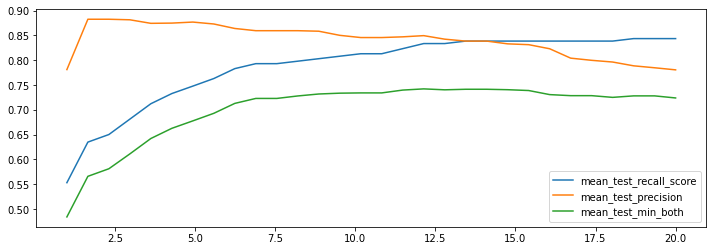

In [39]:
df = pd.DataFrame(grid.cv_results_)

plt.figure(figsize=(12, 4))

for score in ['mean_test_recall_score', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df['param_class_weight']], df[score], label=score)

plt.legend();

Need to investigate why the mean_test_min for both returned such a significant lowever value than expected

In [ ]:
# More code to come


